# Homework 5 - Week 5

### Question 11.1

##### STEPWISE REGRESSION:

In [52]:
# suppressWarnings(suppressMessages(install.packages("caret", repos='http://cran.us.r-project.org', dependencies = TRUE)))
# suppressWarnings(suppressMessages(install.packages("tidyverse", repos='http://cran.us.r-project.org', dependencies = TRUE)))
# suppressWarnings(suppressMessages(install.packages("glmnet", repos='http://cran.us.r-project.org', dependencies = TRUE)))

In [2]:
suppressWarnings(suppressMessages(library(tidyverse)))
suppressWarnings(suppressMessages(library(caret)))
suppressWarnings(suppressMessages(library(glmnet)))
suppressWarnings(suppressMessages(library(magrittr)))

In [3]:
suppressWarnings(suppressMessages(library(MASS)))

In [53]:
# suppressWarnings(suppressMessages(install.packages("leaps", repos='http://cran.us.r-project.org', dependencies = TRUE)))

In [5]:
suppressWarnings(suppressMessages(library(leaps)))

**Read uscrime data**

In [57]:
uscrimes <- read.table("uscrime.txt", header=TRUE, sep="\t")
head(uscrimes)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


I am using stepAIC() function that chooses the best model by AIC. It has an option named direction, which can take the following values: i) “both” (for stepwise regression, both forward and backward
selection); “backward” (for backward selection) and “forward” (for forward selection). It return the best final model.

In [58]:
# Fit the full model
model_0 <- lm(Crime ~., data = uscrimes)
# Stepwise regression model
stepwise.model <- stepAIC(model_0, direction = "both", trace = FALSE)
summary(stepwise.model)


Call:
lm.default(formula = Crime ~ M + Ed + Po1 + M.F + U1 + U2 + Ineq + 
    Prob, data = uscrimes)

Residuals:
    Min      1Q  Median      3Q     Max 
-444.70 -111.07    3.03  122.15  483.30 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6426.10    1194.61  -5.379 4.04e-06 ***
M              93.32      33.50   2.786  0.00828 ** 
Ed            180.12      52.75   3.414  0.00153 ** 
Po1           102.65      15.52   6.613 8.26e-08 ***
M.F            22.34      13.60   1.642  0.10874    
U1          -6086.63    3339.27  -1.823  0.07622 .  
U2            187.35      72.48   2.585  0.01371 *  
Ineq           61.33      13.96   4.394 8.63e-05 ***
Prob        -3796.03    1490.65  -2.547  0.01505 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 195.5 on 38 degrees of freedom
Multiple R-squared:  0.7888,	Adjusted R-squared:  0.7444 
F-statistic: 17.74 on 8 and 38 DF,  p-value: 1.159e-10


**Next,I am using the function regsubsets(), which has the tuning parameter nvmax specifying the maximal number of predictors to incorporate in the model**

**regsubsets() has the option method, which can take the values “backward”, “forward” and “seqrep” (seqrep = sequential replacement, combination of forward and backward selections).**

In [59]:
models <- regsubsets(Crime~., data = uscrimes, nvmax = 15,method = "seqrep")

In [60]:
 # Set seed for reproducibility
set.seed(123)
# Set up repeated k-fold cross-validation
train.control <- trainControl(method = "cv", number = 10)
# Train the model
step.model <- train(Crime ~., data = uscrimes,
                    method = "leapSeq",
                    tuneGrid = data.frame(nvmax = 1:15),
                    trControl = train.control
                   )
step.model$results

nvmax,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
1,294.0919,0.6113474,234.5452,89.54470,0.3090369,68.56939
2,276.3968,0.6873485,215.2010,106.43356,0.3252874,78.51814
3,261.9830,0.6642742,210.9873,110.59097,0.2290087,93.52673
4,271.9430,0.6397970,222.7241,104.89255,0.2758066,74.98079
5,260.3804,0.5930318,209.8459,91.58884,0.2992502,69.13846
6,232.9240,0.7379318,188.7075,97.13428,0.2237860,70.61600
7,237.8892,0.6602768,197.7499,90.42968,0.2886561,67.34118
8,276.3432,0.5354045,226.0451,107.67461,0.3665290,78.50840
9,246.8846,0.6975119,201.3635,92.02137,0.2958348,67.53324
10,257.4864,0.6694090,212.3040,96.25332,0.3222326,70.34452


##### nvmax = 6 has the lowest RMSE. Next, I am going to display the best tuning values (nvmax), automatically selected by the train() function.

In [61]:
step.model$bestTune

,nvmax
6,6


###### This indicates that the best model is the one with nvmax = 6 variables. The function summary() reports the best set of variables for each model size, up to the best 6-variables model.

In [62]:
summary(step.model$finalModel)

Subset selection object
15 Variables  (and intercept)
       Forced in Forced out
M          FALSE      FALSE
So         FALSE      FALSE
Ed         FALSE      FALSE
Po1        FALSE      FALSE
Po2        FALSE      FALSE
LF         FALSE      FALSE
M.F        FALSE      FALSE
Pop        FALSE      FALSE
NW         FALSE      FALSE
U1         FALSE      FALSE
U2         FALSE      FALSE
Wealth     FALSE      FALSE
Ineq       FALSE      FALSE
Prob       FALSE      FALSE
Time       FALSE      FALSE
1 subsets of each size up to 6
Selection Algorithm: 'sequential replacement'
         M   So  Ed  Po1 Po2 LF  M.F Pop NW  U1  U2  Wealth Ineq Prob Time
1  ( 1 ) " " " " " " "*" " " " " " " " " " " " " " " " "    " "  " "  " " 
2  ( 1 ) " " " " " " "*" " " " " " " " " " " " " " " " "    "*"  " "  " " 
3  ( 1 ) " " " " "*" "*" " " " " " " " " " " " " " " " "    "*"  " "  " " 
4  ( 1 ) "*" "*" "*" "*" " " " " " " " " " " " " " " " "    " "  " "  " " 
5  ( 1 ) "*" " " "*" "*" " " " " " " " " " " "

**An asterisk specifies that a given variable is included in the corresponding model.**

**For example, it can be seen that the best 6-variable model contains M+Ed+Po1+U2+Ineq+Prob (Crime ~ M+Ed+Po1+U2+Ineq+Prob).**

**The regression coefficients of the final model (id = 6) is:**

In [63]:
coef(step.model$finalModel, 6)

(Intercept)           M          Ed         Po1          U2        Ineq 
-5040.50498   105.01957   196.47120   115.02419    89.36604    67.65322 
       Prob 
-3801.83628

**The regression coefficients can also be found out by computing the linear model using only the selected predictors**

In [64]:
model_1 <- lm(Crime ~ M+Ed+Po1+U2+Ineq+Prob, data = uscrimes)
summary(model_1)


Call:
lm.default(formula = Crime ~ M + Ed + Po1 + U2 + Ineq + Prob, 
    data = uscrimes)

Residuals:
    Min      1Q  Median      3Q     Max 
-470.68  -78.41  -19.68  133.12  556.23 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5040.50     899.84  -5.602 1.72e-06 ***
M             105.02      33.30   3.154  0.00305 ** 
Ed            196.47      44.75   4.390 8.07e-05 ***
Po1           115.02      13.75   8.363 2.56e-10 ***
U2             89.37      40.91   2.185  0.03483 *  
Ineq           67.65      13.94   4.855 1.88e-05 ***
Prob        -3801.84    1528.10  -2.488  0.01711 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 200.7 on 40 degrees of freedom
Multiple R-squared:  0.7659,	Adjusted R-squared:  0.7307 
F-statistic: 21.81 on 6 and 40 DF,  p-value: 3.418e-11


#### Using this approach returns M, Ed, Po1, U2, Ineq, Prob as significant predictors. Adjusted R squared is 0.7307.

##### LASSO:

**I am going to randomly split the data into training set (80% for building a predictive model) and test set (20% for evaluating the model).**

In [65]:
set.seed(123)
training.samples <- uscrimes$Crime %>% createDataPartition(p = 0.8, list = FALSE)
train.data <- uscrimes[training.samples, ]
test.data <- uscrimes[-training.samples, ]

**The R function model.matrix() helps to create the matrix of predictors and also automatically converts categorical predictors to appropriate dummy variables, which is required for the glmnet()
function.**

In [66]:
x <- scale(model.matrix(Crime~., train.data)[,-1])
y <- train.data$Crime

**I am going to use the R function glmnet() for computing penalized logistic regression.**

In [67]:
lambda = 10^seq(10, -2, length = 100)

In [68]:
lambda

[1] 1.000000e+10 7.564633e+09 5.722368e+09 4.328761e+09 3.274549e+09
  [6] 2.477076e+09 1.873817e+09 1.417474e+09 1.072267e+09 8.111308e+08
 [11] 6.135907e+08 4.641589e+08 3.511192e+08 2.656088e+08 2.009233e+08
 [16] 1.519911e+08 1.149757e+08 8.697490e+07 6.579332e+07 4.977024e+07
 [21] 3.764936e+07 2.848036e+07 2.154435e+07 1.629751e+07 1.232847e+07
 [26] 9.326033e+06 7.054802e+06 5.336699e+06 4.037017e+06 3.053856e+06
 [31] 2.310130e+06 1.747528e+06 1.321941e+06 1.000000e+06 7.564633e+05
 [36] 5.722368e+05 4.328761e+05 3.274549e+05 2.477076e+05 1.873817e+05
 [41] 1.417474e+05 1.072267e+05 8.111308e+04 6.135907e+04 4.641589e+04
 [46] 3.511192e+04 2.656088e+04 2.009233e+04 1.519911e+04 1.149757e+04
 [51] 8.697490e+03 6.579332e+03 4.977024e+03 3.764936e+03 2.848036e+03
 [56] 2.154435e+03 1.629751e+03 1.232847e+03 9.326033e+02 7.054802e+02
 [61] 5.336699e+02 4.037017e+02 3.053856e+02 2.310130e+02 1.747528e+02
 [66] 1.321941e+02 1.000000e+02 7.564633e+01 5.722368e+01 4.328761e+01
 [71] 3.274549e+01 2.477076e+01 1.873817e+01 1.417474e+01 1.072267e+01
 [76] 8.111308e+00 6.135907e+00 4.641589e+00 3.511192e+00 2.656088e+00
 [81] 2.009233e+00 1.519911e+00 1.149757e+00 8.697490e-01 6.579332e-01
 [86] 4.977024e-01 3.764936e-01 2.848036e-01 2.154435e-01 1.629751e-01
 [91] 1.232847e-01 9.326033e-02 7.054802e-02 5.336699e-02 4.037017e-02
 [96] 3.053856e-02 2.310130e-02 1.747528e-02 1.321941e-02 1.000000e-02

In [69]:
# Find the best lambda using cross-validation
set.seed(123)
cv.lasso <- cv.glmnet(x, y, alpha = 1, family = "gaussian")

In [70]:
# Fit the final model on the training data
model <- glmnet(x, y, alpha = 1, family = "gaussian", lambda = lambda)

In [71]:
lasso.model <- cv.glmnet(x, y, alpha = 1, lambda = lambda, nfolds = 10, family = "gaussian")

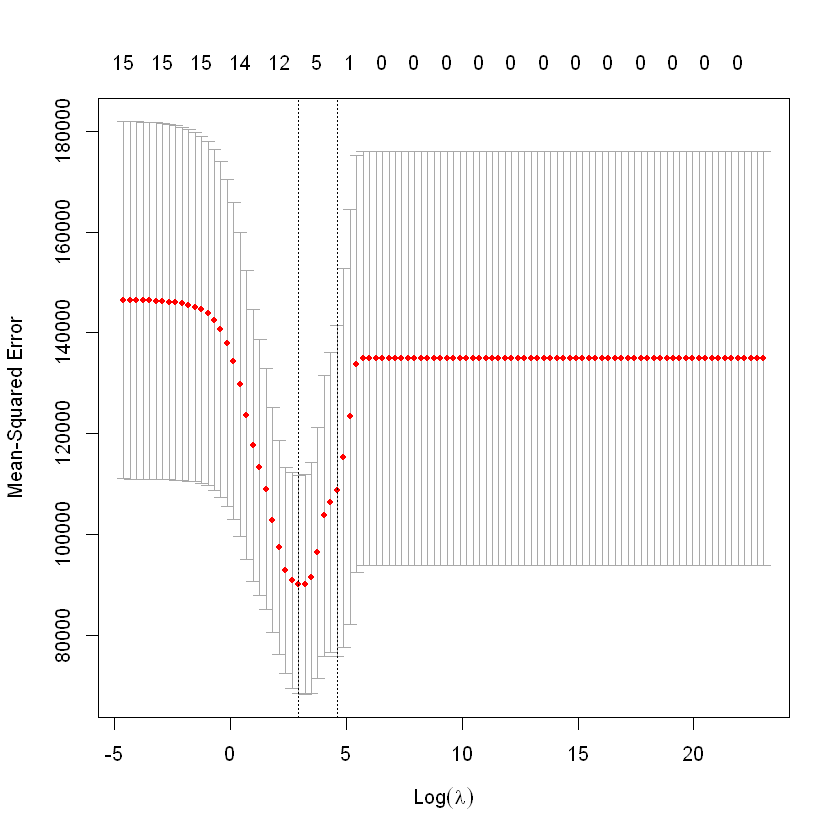

In [72]:
plot(lasso.model)

**The plot displays the cross-validation error according to the log of lambda. The plot indicates that the log of the optimal value of lambda is approximately closer to zero, which is the one that minimizes the prediction error. This lambda value will give the most accurate model.**

**The exact value of lambda is:**

In [73]:
best_lambda <- lasso.model$lambda.min
best_lambda


[1] 18.73817

**Using this value of lambda as the best lambda, we can get the regression coefficients**

In [74]:
coef(lasso.model, best_lambda)

16 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 902.128205
M            59.101431
So           12.136175
Ed           29.374718
Po1         254.274825
Po2           .       
LF            .       
M.F          56.113940
Pop           .       
NW            .       
U1            .       
U2            5.486144
Wealth        .       
Ineq        123.247824
Prob        -88.775754
Time          .       

**Next, I am going to fit a model with the predictors (M + So+ Ed + Po1 + M.F + U2 + Ineq + Prob) using best_lambda and then assess the model accuracy**

In [75]:
lasso.model1 <- lm(Crime ~ M + So+ Ed + Po1 + M.F + U2 + Ineq + Prob, data = uscrimes)
summary(lasso.model1)


Call:
lm.default(formula = Crime ~ M + So + Ed + Po1 + M.F + U2 + Ineq + 
    Prob, data = uscrimes)

Residuals:
    Min      1Q  Median      3Q     Max 
-416.39 -121.33   -1.36  114.57  559.34 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5711.41    1156.48  -4.939 1.61e-05 ***
M              88.43      36.05   2.453 0.018861 *  
So            101.46     113.17   0.897 0.375614    
Ed            175.80      54.51   3.225 0.002588 ** 
Po1           112.71      14.60   7.721 2.66e-09 ***
M.F            13.56      12.80   1.060 0.296030    
U2             75.17      43.03   1.747 0.088723 .  
Ineq           59.93      15.58   3.848 0.000442 ***
Prob        -4457.71    1676.95  -2.658 0.011430 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 201.8 on 38 degrees of freedom
Multiple R-squared:  0.7751,	Adjusted R-squared:  0.7278 
F-statistic: 16.37 on 8 and 38 DF,  p-value: 3.645e-10


##### Using LASSO approach, returns lambda = 18.74. The most significant predictors are M + So+ Ed + Po1 + M.F + U2 + Ineq + Prob. Adjusted R squared is 0.7278. p_value is much less than 0.001.

**I will try the LASSO approach using caret package**

In [76]:
# Build the model
set.seed(123)
lasso <- train(
    Crime ~., data = train.data, method = "glmnet",
    trControl = trainControl("cv", number = 10),
    tuneGrid = expand.grid(alpha = 1, lambda = lambda)
)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [77]:
# Model coefficients
coef(lasso$finalModel, lasso$bestTune$lambda)

16 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept) -3.777694e+03
M            5.833848e+01
So           3.266619e+01
Ed           6.477957e+01
Po1          9.428008e+01
Po2          .           
LF           .           
M.F          1.784047e+01
Pop          .           
NW           .           
U1           .           
U2           2.494414e+01
Wealth       1.379219e-06
Ineq         3.963253e+01
Prob        -4.973702e+03
Time         .           

In [78]:
lasso$bestTune$lambda

[1] 14.17474

### Using caret package yields lambda = 14.17

In [79]:
# Make predictions
predictions <- lasso %>% predict(test.data)

In [80]:
predictions

3         6        18        20        26        30        31        41 
 471.2402  874.7149  763.5783 1103.3024 1686.8699  712.2727  707.9072  831.0867

In [81]:
 # Model prediction performance
data.frame(
    RMSE = RMSE(predictions, test.data$Crime),
    Rsquare = R2(predictions, test.data$Crime)
)

RMSE,Rsquare
193.406,0.8768125


# ELASTIC NET

**This approach combines lasso and ridge regression methods. Lambda = 1 and Alpha can vary between 0 and 1.**

**I am going to use caret to get the best model**

In [82]:
set.seed(123)
training.samples <- uscrimes$Crime %>% createDataPartition(p = 0.8, list = FALSE)
train.data <- uscrimes[training.samples, ]
test.data <- uscrimes[-training.samples, ]

In [83]:
x <- scale(model.matrix(Crime~., train.data)[,-1])
y <- train.data$Crime
lambda = 10^seq(10, -2, length = 100)
alpha = seq(0.0, 1.0, by = 0.1)

In [84]:
train_control <- trainControl(method="cv", number=10)
grid <- expand.grid(alpha = alpha,lambda = lambda)

In [85]:
elastic_model <- train(x, y, method = "glmnet", tuneGrid = grid, trControl = train_control)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [86]:
elastic_model$bestTune

,alpha,lambda
38,0,305.3856


From the above, the best value of alpha = 0 and best value of lambda = 305.3856

**Coefficients of the elastic net model:**

In [87]:
coef(elastic_model$finalModel, elastic_model$bestTune$lambda)

16 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 902.128205
M            37.421451
So           23.477864
Ed           24.965912
Po1          72.075533
Po2          68.814423
LF            4.057885
M.F          41.323797
Pop          26.274182
NW           28.178510
U1          -13.035689
U2           18.329915
Wealth       24.667759
Ineq         37.019598
Prob        -62.980711
Time          3.841732

**Next, I am going to fit the model with the predictors (M + So+ Po1 + Po2 + M.F + NW + Ineq + Prob) and assess the model accuracy.**

In [88]:
final.elastic.model <- lm(Crime ~ M + So+ Po1 + Po2 + M.F + NW + Ineq + Prob, data = uscrimes)
summary(final.elastic.model)


Call:
lm.default(formula = Crime ~ M + So + Po1 + Po2 + M.F + NW + 
    Ineq + Prob, data = uscrimes)

Residuals:
    Min      1Q  Median      3Q     Max 
-503.51 -109.32   31.78  121.54  461.81 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4793.3744  1292.3496  -3.709 0.000663 ***
M              56.8152    39.7805   1.428 0.161398    
So             76.9376   132.5291   0.581 0.564982    
Po1           156.3860   102.7777   1.522 0.136389    
Po2           -39.0842   112.4549  -0.348 0.730093    
M.F            34.2062    12.8491   2.662 0.011319 *  
NW             -0.6355     6.1847  -0.103 0.918697    
Ineq           37.5800    17.6254   2.132 0.039518 *  
Prob        -4584.9286  1926.7576  -2.380 0.022455 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 227.7 on 38 degrees of freedom
Multiple R-squared:  0.7137,	Adjusted R-squared:  0.6535 
F-statistic: 11.84 on 8 and 38 DF,  p-value: 2.837e-08


#### The most significant predictors are M + So + Po1 + Po2 + M.F + NW + Ineq + Prob. Adjusted R squared is 0.0.6535. p_value is much less than 0.001.

**The performance of the different models - lasso and elastic net - can be compared using caret. The best model is defined as the one that minimizes the prediction error.**

In [89]:
models <- list(lasso = lasso, elastic = elastic_model)
resamples(models) %>% summary( metric = "RMSE")


Call:
summary.resamples(object = ., metric = "RMSE")

Models: lasso, elastic 
Number of resamples: 10 

RMSE 
            Min.  1st Qu.  Median     Mean  3rd Qu.     Max. NA's
lasso   88.60490 173.3667 269.260 263.0751 349.9370 413.1937    0
elastic 78.29369 218.0573 259.314 267.5597 311.5064 495.1273    0


###### It is seen that Elastic Net model has the lowest median RMSE.

# Question 12.1

My sister-in-law is working as an Insights Analyst in Chicago. She is working on analyzing marketing insights from google trends data to study the target population that buys the company's products. I was suggesting that she can develop a scoring model that ranks customers/regions with highest to lowest google searches to product bought ratios. Creating an experiment like this will help her company categorize the regions that will be more responsive to marketing emails. This will help the company focus on regions that the product can be forecasted to sell the best. And a combination of google searches to product bought ratio along with data like demography can help accelarate the sales a lot better. It might also help the company understand better the purchasing power parity trends of a region so one region can be focussed for low cost products alone that the other regions.

# Question 12.2

In [90]:
# suppressWarnings(suppressMessages(install.packages("FrF2", repos='http://cran.us.r-project.org', dependencies = TRUE)))

In [91]:
suppressWarnings(suppressMessages(library(FrF2)))

In [92]:
FrF2(nruns = 16, nfactors = 10, factor.names = c('Feature.1','Feature.2','Feature.3','Feature.4','Feature.5','Feature.6',
                                                 'Feature.7','Feature.8','Feature.9','Feature.10'),
     default.levels = c(-1, 1))

Feature.1,Feature.2,Feature.3,Feature.4,Feature.5,Feature.6,Feature.7,Feature.8,Feature.9,Feature.10
1,-1,-1,1,-1,-1,1,1,1,1
1,-1,1,1,-1,1,-1,1,-1,-1
-1,1,1,1,-1,-1,1,-1,1,-1
-1,-1,-1,1,1,1,1,-1,1,-1
-1,-1,1,1,1,-1,-1,-1,-1,1
-1,1,1,-1,-1,-1,1,1,-1,1
1,1,1,1,1,1,1,1,1,1
-1,1,-1,1,-1,1,-1,-1,-1,1
-1,1,-1,-1,-1,1,-1,1,1,-1
1,1,-1,1,1,-1,-1,1,-1,-1


**nruns = 16 (16 houses), nfactors = 10 (10 features).**

**The above is the fractional factorial design for this experiment showing what set of features each house should have. -1: Don't Include and 1: Include features.**

# Question 13.1

**Examples of data I woud expect to follow the distributions:**

1. Binomial Distribution: Likelihood that Rafa Nadal will win over Roger Federer in French open in each meeting, with each meeting distributed once a year for the years both of them are active at the same time.

2. Geometric Distribution: My grandparents kept having babies until they birthed a boy baby (finding gender of the unborn baby is illegal in India). The probability that they kept having girl child until my uncle was born.

3. Poisson Distribution: Number of calls made to an IT Service business is an example of Poisson distribution.

4. Exponential Distribution: Time between a particular IT help desk receiving calls is an example of exponential distribution.

5. Weibull Distribution: At work, I have used Weibull distribution to predict when a Machine Component will fail (depending on the application). Has helped the company make replacements based on condition monitoring following a Weibull distribution.